**Signal model and PDF**

First, the signal model. vector parameter embedded in gaussian noise, however each individual independant measurement has a unique covariance matrix.

$$ \bf{x}[n] = \bf{\theta} + \bf{w}[n], \hspace{35pt} \bf{w}[n] \sim \mathcal{N}(0, \bf{C}[n])$$

PDF of single measurement, simple multivariate normal.

$$p(\bf{x}[n];\bf{\theta}) = \frac{1}{(2\pi)^{k/2}det(\bf{C}[n])^{1/2}}exp\left\{    -\frac{1}{2}(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta})      \right\}$$

$$\bf{X} = \{ x[n] | n \in 0..(N-1)\} $$

Since each measurement is independant, the total probability is the product of N measurements.

$$p(\bf{X};\bf{\theta}) = \prod_{n=0}^{N-1}\frac{1}{(2\pi)^{k/2}det(\bf{C}[n])^{1/2}}exp\left\{    -\frac{1}{2}(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta})      \right\}$$

$$p(\bf{X};\bf{\theta}) = \left[\prod_{n=0}^{N-1}\frac{1}{(2\pi)^{k/2}det(\bf{C}[n])^{1/2}} \right] exp\left\{    -\frac{1}{2} \sum_{n=0}^{N-1}\left[(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) \right]     \right\}$$

**MLE**

The maximum likelihood estimate $\hat{\bf{\theta}}_{mle}$ is the arg-max of the pdf parameterized by $\theta$.

$$\hat{\bf{\theta}}_{mle} = \arg\max_{\bf{\theta}} \left\{ p(\bf{X};\bf{\theta}) \right\}$$

$$\hat{\bf{\theta}}_{mle} = \arg\max_{\bf{\theta}} \left\{ \left[\prod_{n=0}^{N-1}\frac{1}{(2\pi)^{k/2}det(\bf{C}[n])^{1/2}} \right] exp\left\{    -\frac{1}{2} \sum_{n=0}^{N-1}\left[(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) \right]     \right\} \right\}$$

$$\hat{\bf{\theta}}_{mle} = \arg\max_{\bf{\theta}} \left\{ exp\left\{    -\frac{1}{2} \sum_{n=0}^{N-1}\left[(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) \right]     \right\} \right\}$$

$$\hat{\bf{\theta}}_{mle} = \arg\min_{\bf{\theta}} \left\{ \sum_{n=0}^{N-1}\left[(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) \right]     \right\} $$

To find the MLE from this quadratic expression, take the gradient with respect to $\theta$ and set to zero.

$$\bf{\nabla_{\theta}} \left[ \sum_{n=0}^{N-1}\left[(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) \right] \right] = 0$$



$$\bf{\nabla_{\theta}} \left[ \sum_{n=0}^{N-1}\left[(\bf{x}[n] - \bf{\theta})^T\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) \right] \right] = \sum_{n=0}^{N-1}\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) = 0 $$

Factor out and rearrange:

$$ 0 = \sum_{n=0}^{N-1}\bf{C}[n]^{-1}(\bf{x}[n] - \bf{\theta}) = \sum_{n=0}^{N-1}\left[     \bf{C}[n]^{-1}\bf{x}[n] - \bf{C}[n]^{-1}\bf{\theta}\right] = \sum_{n=0}^{N-1}\left[\bf{C}[n]^{-1}\bf{x}[n]\right] - \sum_{n=0}^{N-1}\left[\bf{C}[n]^{-1}\bf{\theta}\right]$$

Separate measurement data and parameter:

$$ \sum_{n=0}^{N-1}\left[\bf{C}[n]^{-1}\bf{x}[n]\right] = \sum_{n=0}^{N-1}\left[\bf{C}[n]^{-1}\bf{\theta})\right] = \left[\sum_{n=0}^{N-1}\bf{C}[n]^{-1}\right]\bf{\theta}$$

Label this matrix $A$ for simplicity

$$ \bf{A} = \left[\sum_{n=0}^{N-1}\bf{C}[n]^{-1}\right]$$

$$ \sum_{n=0}^{N-1}\left[\bf{C}[n]^{-1}\bf{x}[n]\right] = \bf{A\theta}$$

Multiply by inverse of $A$ to isolate $\theta$

$$ \bf{A}^{-1}\sum_{n=0}^{N-1}\left[\bf{C}[n]^{-1}\bf{x}[n]\right] = \bf{A}^{-1}\bf{A}\bf{\theta} = \bf{\theta}$$

Final form of MLE:

$$ \hat{\bf{\theta}}_{mle}  =  \left[\sum_{n=0}^{N-1}\bf{C}[n]^{-1}\right]^{-1}  \left[\sum_{n=0}^{N-1}\bf{C}[n]^{-1}\bf{x}[n]\right] $$










In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


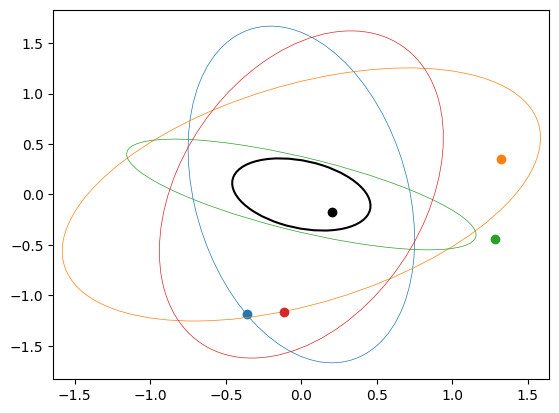

In [84]:
N = 4
k=2

x = np.zeros((N, k))
C = np.zeros((N, k, k))
C_inv = np.zeros((N, k, k))
C_inv_x = np.zeros((N, k))

# Create a figure and axes
fig, ax = plt.subplots()

for n in range(N):
    sigmas = np.random.uniform(low=0.1, high=2.0, size=k)
    D = np.diag(sigmas*sigmas)
    #2d case:
    theta = np.random.uniform(low=0, high=2*np.pi, size=1)[0]
    Q = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    C[n] = Q @ D @ Q.T

    color = 'C'+str(n)
    
    x[n] = np.random.multivariate_normal((0,0), C[n])
    
    C_inv[n] = np.linalg.inv(C[n])
    C_inv_x[n] = C_inv[n] @ x[n]

    # Create an ellipse patch
    ellipse = Ellipse(xy=(0, 0), width=sigmas[0]*2, height=sigmas[1]*2, angle=np.degrees(theta), edgecolor=color, fc='None', lw=0.5)
    ax.add_patch(ellipse)
    plt.scatter(x[n][0], x[n][1], c=color)

C_inv_x_sum = np.sum(C_inv_x, axis=0)
C_inv_sum = np.sum(C_inv, axis=0)

C_inv_sum_inv = np.linalg.inv(C_inv_sum)

mle = C_inv_sum_inv @ C_inv_x_sum

plt.scatter(mle[0], mle[1], c='black')

mle_var = C_inv_sum_inv
eigval, eigvec = np.linalg.eig(mle_var)
theta = np.atan2(eigvec[1,0], eigvec[1,1])
ellipse = Ellipse(xy=(0, 0), width=np.sqrt(eigval[0])*2, height=np.sqrt(eigval[1])*2, angle=np.degrees(theta), edgecolor='black', fc='None', lw=1.5)
ax.add_patch(ellipse)

ax.autoscale()    